In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from molmap import AggMap
import pandas as pd
import numpy as np

from molmap.utils.matrixopt import smartpadding, conv2

RDKit WARNING: [20:06:54] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
data = load_digits(n_class = 3)

In [3]:
X = data.data

In [4]:
from sklearn.utils import shuffle
idx = range(X.shape[1])
idx = shuffle(idx, random_state = 0)

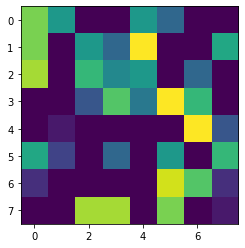

In [5]:
shuffled_X = X.T[idx].T
plt.imshow(shuffled_X[0].reshape(8,8))

In [6]:
dfx = pd.DataFrame(shuffled_X)

In [7]:
mp = AggMap(dfx, "correlation")

2020-09-08 20:06:56,603 - INFO - [bidd-molmap] - Calculating distance ...
2020-09-08 20:06:56,604 - INFO - [bidd-molmap] - the number of process is 16


100%|##########| 64/64 [00:00<00:00, 1240.59it/s]


In [8]:
mp.fit(cluster_channels = 1, var_thr = 0, fmap_shape = (10,10))

2020-09-08 20:07:00,121 - INFO - [bidd-molmap] - applying hierarchical clustering to obtain group information ...
UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Tue Sep  8 20:07:00 2020 Finding Nearest Neighbors
Tue Sep  8 20:07:00 2020 Finished Nearest Neighbor Search
Tue Sep  8 20:07:01 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Sep  8 20:07:02 2020 Finished embedding
2020-09-08 20:07:02,604 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-09-08 20:07:02,610 - INFO - [bidd-molmap] - Finished


In [13]:
new_X = mp.batch_transform(shuffled_X,scale=False)

100%|##########| 537/537 [00:02<00:00, 188.09it/s]


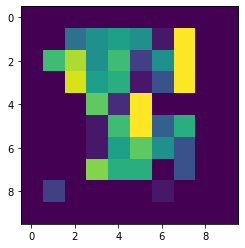

In [16]:
plt.imshow(new_X[3].reshape(10,10))

In [45]:
mp.plot_scatter()

2020-09-08 19:32:05,198 - INFO - [bidd-molmap] - generate file: ./feature points_56_correlation_umap_scatter
2020-09-08 19:32:05,210 - INFO - [bidd-molmap] - save html file to ./feature points_56_correlation_umap_scatter


In [46]:
new_X.shape

(537, 8, 7, 1)